In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import itertools
import warnings

warnings.filterwarnings('ignore')

# Upload data

In [3]:
results_0M_20 = np.load('results_pairs_ACTR_0M_20.npy', allow_pickle=True)
results_0M_20_df = pd.DataFrame.from_records(results_0M_20)

results_0M_30 = np.load('results_pairs_ACTR_0M_30.npy', allow_pickle=True)
results_0M_30_df = pd.DataFrame.from_records(results_0M_30)

In [4]:
results_2_5M_20 = np.load('results_pairs_ACTR_2_5M_20.npy', allow_pickle=True)
results_2_5M_20_df = pd.DataFrame.from_records(results_2_5M_20)

results_2_5M_30 = np.load('results_pairs_ACTR_2_5M_30.npy', allow_pickle=True)
results_2_5M_30_df = pd.DataFrame.from_records(results_2_5M_30)

In [5]:
results_5M_20 = np.load('results_pairs_ACTR_5M_20.npy', allow_pickle=True)
results_5M_20_df = pd.DataFrame.from_records(results_5M_20)

results_5M_30 = np.load('results_pairs_ACTR_5M_30.npy', allow_pickle=True)
results_5M_30_df = pd.DataFrame.from_records(results_5M_30)

In [6]:
# 0 M
Ex_0M = np.tile([0.61, 0.47, 0.61], 2)
Es_0M = np.array(results_0M_30_df['Es'])
Ed_0M = np.array(results_0M_30_df['Ed'])
Ed2_0M = np.array(results_0M_30_df['Ed2'])
E_avg_0M = np.average([Es_0M, Ed_0M, Ed2_0M], axis=0)
cutoff_0M = np.tile(results_0M_30_df['cutoff'], 5)
urea_0M = np.tile(results_0M_30_df['[urea]'], 5)
res_0M = np.tile(['3-61', '3-75', '33-75', '3-61', '3-75', '33-75'], 5)
allE_0M = np.concatenate([Ex_0M, Es_0M, Ed_0M, Ed2_0M, E_avg_0M])
name_0M = np.repeat(['Ex', 'Static', 'Dynamic', 'Dynamic+', 'Average'], 6)
ACTR_0M_df = pd.DataFrame({'E': allE_0M, '[Urea]': urea_0M, 'name': name_0M, 
                               'cutoff': cutoff_0M, 'res': res_0M})

# 2.5 M
Ex_2_5M = np.tile([0.49, 0.38, 0.51], 2)
Es_2_5M = np.array(results_2_5M_30_df['Es'])
Ed_2_5M = np.array(results_2_5M_30_df['Ed'])
Ed2_2_5M = np.array(results_2_5M_30_df['Ed2'])
E_avg_2_5M = np.average([Es_2_5M, Ed_2_5M, Ed2_2_5M], axis=0)
cutoff_2_5M = np.tile(results_2_5M_30_df['cutoff'], 5)
urea_2_5M = np.tile(results_2_5M_30_df['[urea]'], 5)
res_2_5M = np.tile(['3-61', '3-75', '33-75', '3-61', '3-75', '33-75'], 5)
allE_2_5M = np.concatenate([Ex_2_5M, Es_2_5M, Ed_2_5M, Ed2_2_5M, E_avg_2_5M])
name_2_5M = np.repeat(['Ex', 'Static', 'Dynamic', 'Dynamic+', 'Average'], 6)
ACTR_2_5M_df = pd.DataFrame({'E': allE_2_5M, '[Urea]': urea_2_5M, 'name': name_2_5M, 
                               'cutoff': cutoff_2_5M, 'res': res_2_5M})

# 5 M
Ex_5M = np.tile([0.42, 0.34, 0.46], 2)
Es_5M = np.array(results_5M_30_df['Es'])
Ed_5M = np.array(results_5M_30_df['Ed'])
Ed2_5M = np.array(results_5M_30_df['Ed2'])
E_avg_5M = np.average([Es_5M, Ed_5M, Ed2_5M], axis=0)
cutoff_5M = np.tile(results_5M_30_df['cutoff'], 5)
urea_5M = np.tile(results_5M_30_df['[urea]'], 5)
res_5M = np.tile(['3-61', '3-75', '33-75', '3-61', '3-75', '33-75'], 5)
allE_5M = np.concatenate([Ex_5M, Es_5M, Ed_5M, Ed2_5M, E_avg_5M])
name_5M = np.repeat(['Ex', 'Static', 'Dynamic', 'Dynamic+', 'Average'], 6)
ACTR_5M_df = pd.DataFrame({'E': allE_5M, '[Urea]': urea_5M, 'name': name_5M, 
                               'cutoff': cutoff_5M, 'res': res_5M})

ACTR_all_urea_df = pd.concat([ACTR_0M_df, ACTR_2_5M_df, ACTR_5M_df], ignore_index=True)

## PLOT

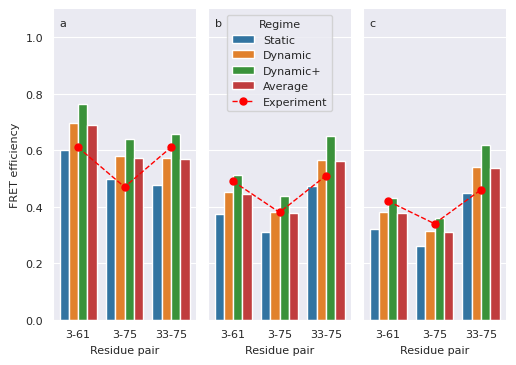

In [8]:
sns.set_style('darkgrid')

g = sns.catplot(data=ACTR_all_urea_df.loc[(ACTR_all_urea_df['name'] != 'Ex') &
                                          (ACTR_all_urea_df['cutoff'] == 20)], 
                x='res', y='E', hue='name', col='[Urea]', 
                sharey=True, sharex=False, 
                kind="bar", legend=False)

g.fig.set_size_inches(5.2, 3.7)

ax = g.axes

ax[0, 0].errorbar(['3-61', '3-75', '33-75'], Ex_0M[0:3], linewidth=1, 
                  marker='.', markersize=10, label='Experiment', linestyle='dashed', color='red');

ax[0, 1].errorbar(['3-61', '3-75', '33-75'], Ex_2_5M[0:3], linewidth=1, 
                  marker='.', markersize=10, label='Experiment', linestyle='dashed', color='red');

ax[0, 2].errorbar(['3-61', '3-75', '33-75'], Ex_5M[0:3], linewidth=1, 
                  marker='.', markersize=10, label='Experiment', linestyle='dashed', color='red');

# Labels
for cols in [0, 1, 2]:
        
    ax[0, cols].set_ylim(0, 1.1)
        
    for label in (ax[0, cols].get_xticklabels() + ax[0, cols].get_yticklabels()):
        label.set_fontsize(8)
        
# Axis labels
ax[0, 0].set_title(None)
ax[0, 1].set_title(None)
ax[0, 2].set_title(None)

ax[0, 0].set_xlabel('Residue pair', fontsize=8)
ax[0, 1].set_xlabel('Residue pair', fontsize=8)
ax[0, 2].set_xlabel('Residue pair', fontsize=8)

ax[0, 0].set_ylabel('FRET efficiency', fontsize=8)    

ax[0, 1].legend(loc='upper center', title='Regime', title_fontsize=8, fontsize=8)

ax[0, 0].text(-0.4, 1.04, "a")
ax[0, 1].text(-0.4, 1.04, "b")
ax[0, 2].text(-0.4, 1.04, "c")

plt.tight_layout()

plt.show()

# g.savefig('Fig4.eps')
# g.savefig('Fig4.png', dpi=320)